In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df[['sqft_living']].values.reshape(-1,1)[:1000]
y = house_df[['price']].values.reshape(-1)[:1000]

Mean squared error: 57947526161.288376
Score: 0.49670880166311393


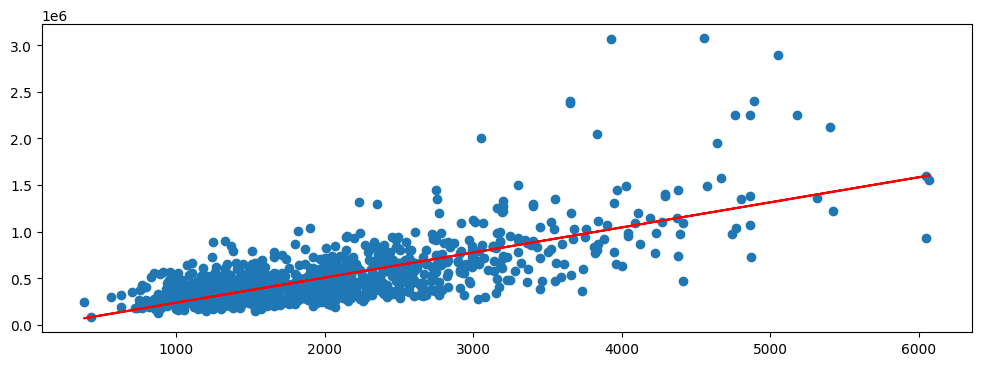

In [3]:
#b)
model = LinearRegression()
model.fit(X, y) 

y_pred = model.predict(X)
X_ax = X.reshape(1, -1)[0]

fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(X_ax, y)
ax.plot(X_ax, y_pred, c="r")

print("Mean squared error: {0}".format(mean_squared_error(y_pred, y)))
print("Score: {0}".format(model.score(X, y)))


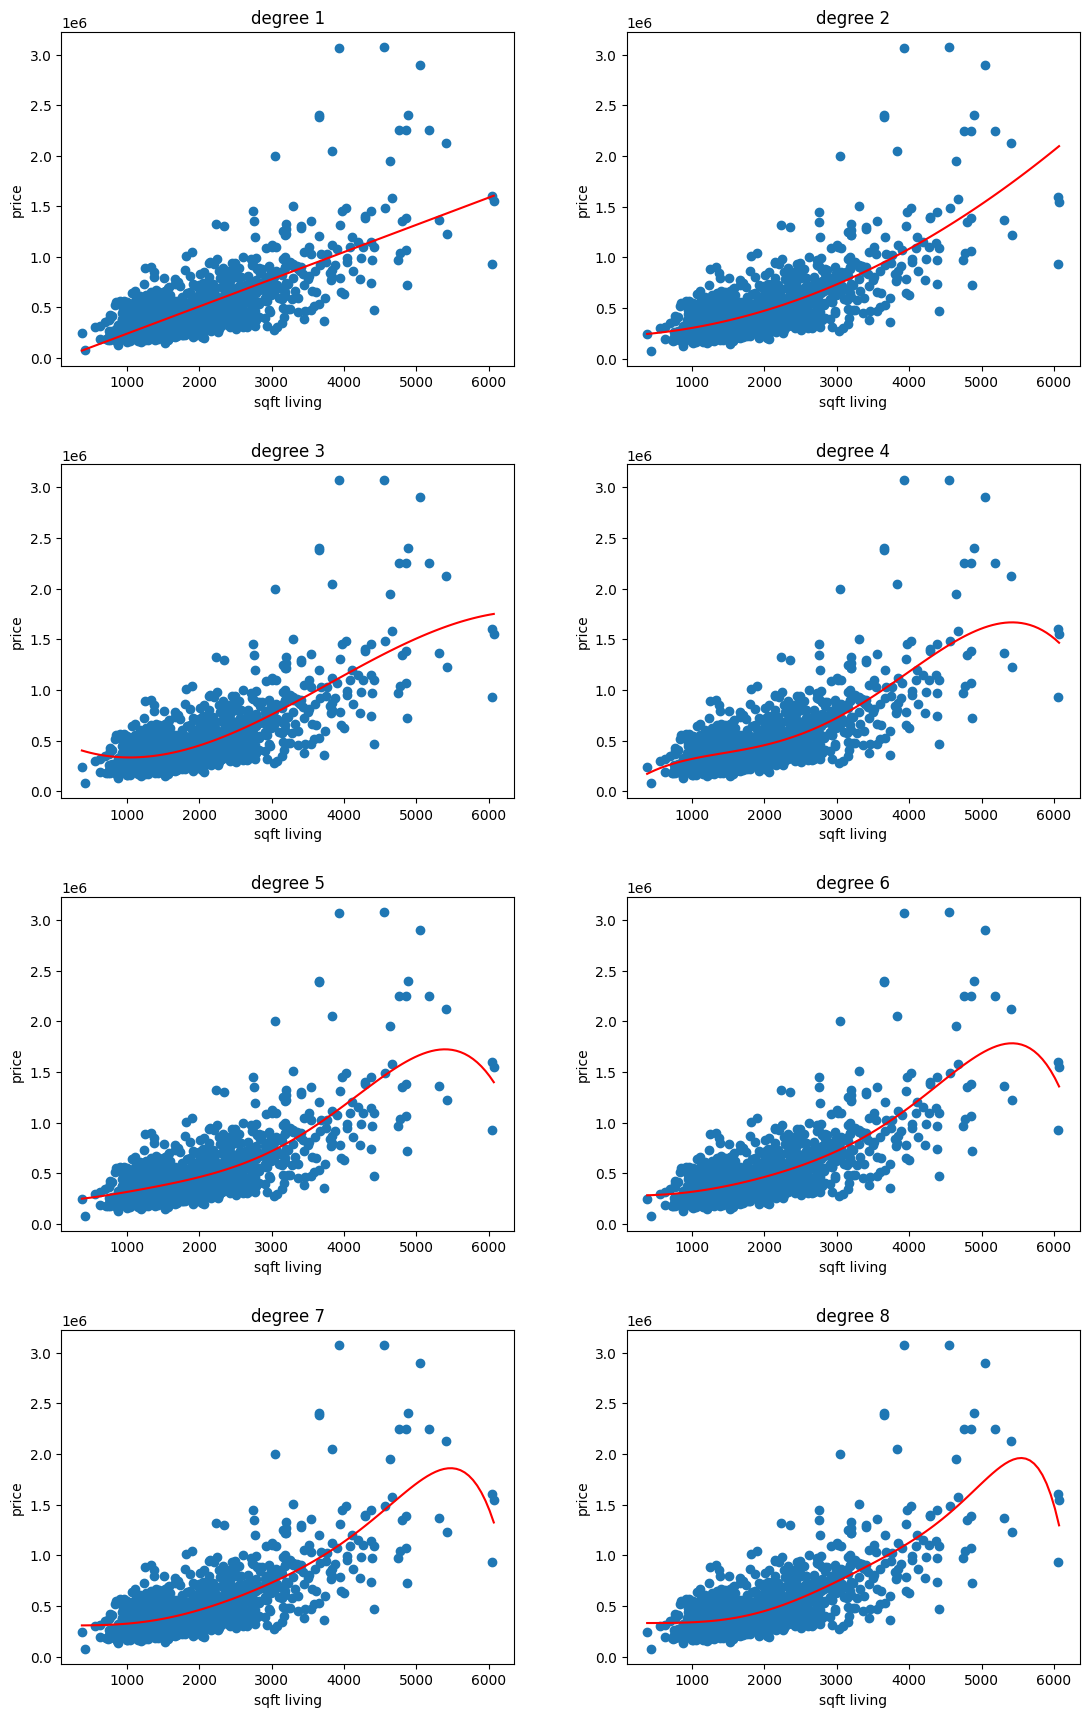

In [4]:
#c)

fig, axes = plt.subplots(4, 2, figsize=(12, 18))
axes = axes.reshape(1, 8)[0]
fig.tight_layout(pad=5)

error = []

for order in range(1, 9):
    ax = axes[order-1]
    poly = PolynomialFeatures(order, include_bias = False)
    X_train = poly.fit_transform(X)
    y_train = y
    
    space = np.linspace(X.min(), X.max(), num=100).reshape(-1,1)
    X_disp = poly.fit_transform(space)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_disp = model.predict(X_disp)
    y_pred = model.predict(X_train)
    
    error.append(mean_squared_error(y_pred, y_train))
    
    ax.scatter(X.reshape(1, -1)[0], y_train)
    ax.plot(space, y_disp, c="r")
    
    ax.set_ylabel("price")
    ax.set_xlabel("sqft living")
    ax.set_title("degree {}".format(order))

plt.show()

error_df = pd.DataFrame(error, columns=["mean_squared_error"])

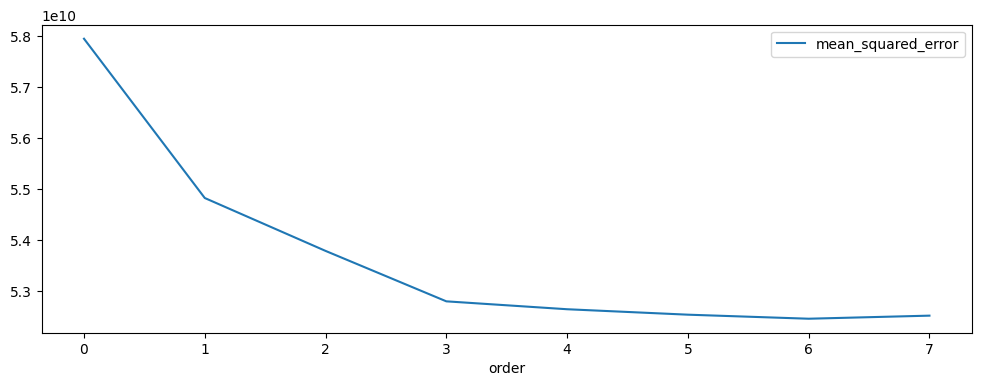

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
error_df.plot(ax=ax)
ax.set_xlabel("order")
plt.show()

# When testing set and training set are the same, predicition error continues to go down with increasing polynomial order

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

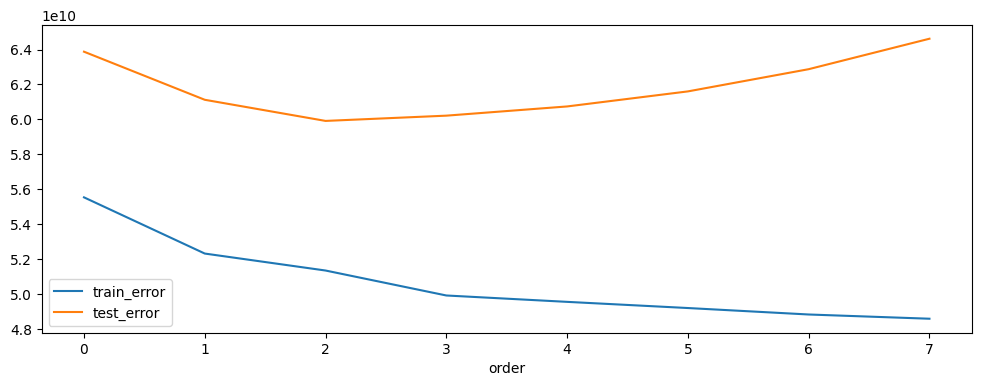

In [6]:
#a)

train_error = []
test_error = []

for order in range(1,9):   
    poly = PolynomialFeatures(order, include_bias = False)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=44)
    
    model = LinearRegression() 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_train)
    train_error.append(mean_squared_error(y_pred, y_train))
    
    y_pred = model.predict(X_test)
    test_error.append(mean_squared_error(y_pred, y_test))

train_df = pd.DataFrame(train_error, columns=["train_error"])
test_df = pd.DataFrame(test_error, columns=["test_error"])

fig, ax = plt.subplots(figsize=(12, 4))
pd.concat([train_df, test_df]).plot(ax=ax)
ax.set_xlabel("order")
plt.show()

# In general prediction error is lower for the train set, and is getting lower for higher order polynomials.
# Predictions for the test set however, are worse. Instead of decreasing for higher order polynomials, error is increasing
# due to overfitting for polynomials of order > 2.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Mean squared error: 334794.4063804449
Score: 0.5314559764496656


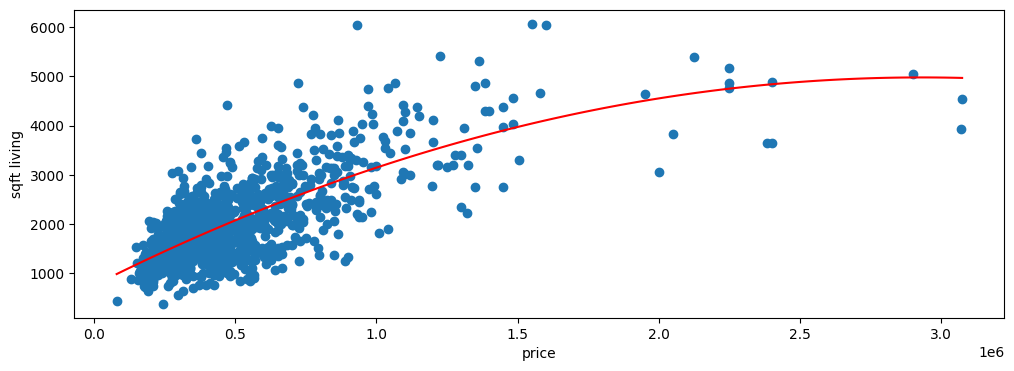

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

poly = PolynomialFeatures(2, include_bias = False)
X_ = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=44)

model = LinearRegression() 
model.fit(X_train, y_train)

space = np.linspace(X.min(), X.max(), num=100).reshape(-1,1)
X_disp = poly.fit_transform(space)
y_disp = model.predict(X_disp)
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(X.reshape(1, -1)[0], y)
ax.plot(space, y_disp, c="r")

ax.set_xlabel("price")
ax.set_ylabel("sqft living")

print("Mean squared error: {0}".format(mean_squared_error(y_pred, y_test)))
print("Score: {0}".format(model.score(X_, y)))

plt.show()

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
ref_err = mean_squared_error(y_pred, y_test)
print("Mean squared error equals: {0}".format(ref_err))

#Your model:

Mean squared error equals: 48749250331.21729


In [9]:
# define function to evaluate model error for given features and polynomial order

def eval_model(target, features, order):
    X = house_df[features].values.reshape(-1, len(features))
    y = house_df[target].values.reshape(-1)

    poly = PolynomialFeatures(order, include_bias = False)
    X = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

    model = LinearRegression() 
    model.fit(X_train, y_train) 

    y_pred = model.predict(X_test)
    err = mean_squared_error(y_pred, y_test)

    return err

In [10]:
# By changing set of used features and polynomial order to 2,
# model was able to perform with ~16% lower error

features = [
    "waterfront",
    "view",
    "condition",
    "grade",
    # "bathrooms",
    # "bedrooms",
    # "floors",
    # "sqft_above",
    # "sqft_basement",
    "sqft_living",
    # "sqft_lot",
    "yr_built",
    # "yr_renovated",
]

err = eval_model('price', features, 2)
improvement = (1 - err / ref_err) * 100

print("improvement: {:.2f}%".format(improvement))

improvement: 16.29%
